**Name:** Luong Nguyen  
**Student ID:** 1504210
<h3>Cognitive Systems Mathematics and Methods  
Assignment 2: Cluster Analysis</h3>
<hr>

## Import data

In [1]:
import pandas as pd 

# Load Data From CSV File
df = pd.read_csv('drone_delivery_v1.csv', sep=';')
df.index += 1 
# drop clientid
df.drop(columns=['clientid'], inplace=True)
print(df.head().transpose())

            1           2           3           4           5
x  622.771572  416.357298  292.735020  737.211288  540.475375
y  164.857623  630.193634  567.333231  166.225676  682.912298


## 1. Visualize the client locations

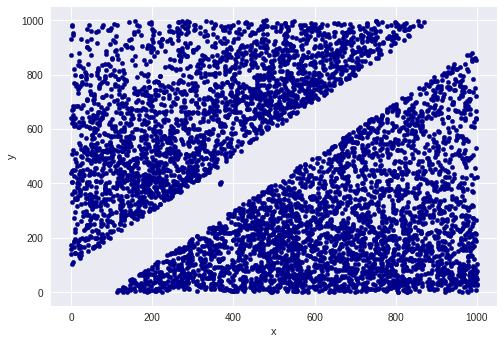

In [2]:
import matplotlib.pyplot as plt

df.plot.scatter(x='x', y='y', color='DarkBlue');

```There might be a river seperates the 2 areas.```

## 2. Find optimal locations for 3 drone depots using k-means clustering

In [3]:
from sklearn.cluster import KMeans
import time

X = df.values

def kmeans_clustering(X, n_clusters):
  kmeans = KMeans(n_clusters)
  kmeans.fit(X)
  return kmeans

  y_kmeans = kmeans.predict(X)
  
start = time.time()
kmeans = kmeans_clustering(X, 3)
y_kmeans = kmeans.predict(X)
end = time.time()

print(f'This algorithm took {end-start:.3f} second')

centers = kmeans.cluster_centers_

for idx, center in enumerate(centers):
  print(f'Center number {idx+1} is located at ({center[0]} : {center[1]})')

This algorithm took 0.137 second
Center number 1 is located at (549.7685606368237 : 787.5854617229135)
Center number 2 is located at (197.20147541262924 : 386.08223925502955)
Center number 3 is located at (700.789958947153 : 211.1231043820145)


## 3. New dataframe with an column that contains the identifier of the depot nearest to the client

In [4]:
import numpy as np

df['depot'] = y_kmeans

print(df.head(10))

             x           y  depot
1   622.771572  164.857623      2
2   416.357298  630.193634      0
3   292.735020  567.333231      1
4   737.211288  166.225676      2
5   540.475375  682.912298      0
6   535.469492  318.439661      2
7   640.380050  870.833221      0
8   235.772075  359.048203      1
9   481.896884  661.491838      0
10  730.032789  312.177817      2


## 4. Scatterplot with 3 different colors

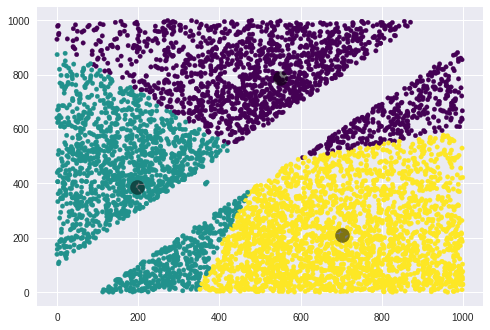

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=20, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.show()

## 5. Optimal locations for 10 depots

This algorithm took 0.502 second


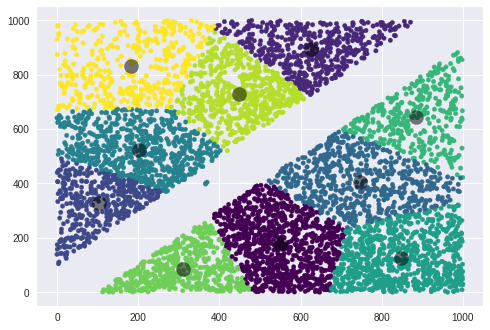

In [6]:
start = time.time()

start = time.time()
kmeans = kmeans_clustering(X, 10)
y_kmeans = kmeans.predict(X)
end = time.time()
print(f'This algorithm took {end-start:.3f} second')

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=20, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.show()

```As the number of depots increases, the longer the algorithm took to find the positions. (0.5 second vs 0.1 second)```

## 6. Agglomerative hierarchical clustering

This algorithm took 1.050 second


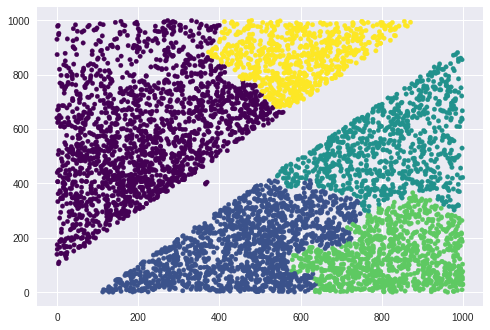

In [13]:
from sklearn.cluster import AgglomerativeClustering 

def agglomerative_clustering(X, n_clusters):
  agglom = AgglomerativeClustering(n_clusters)
  agglom.fit(X)  
  return agglom


start = time.time()
agglom = agglomerative_clustering(X, n_clusters = 5)
end = time.time()

print(f'This algorithm took {end-start:.3f} second')

plt.scatter(X[:, 0], X[:, 1], c=agglom.labels_, s=20, cmap='viridis')
plt.show()

### Compare running times

In [0]:
kmeans_times = []
agglomerative_times = []

for n_clusters in range(2, 31):
  start = time.time()
  kmeans = kmeans_clustering(X, n_clusters)
  y_kmeans = kmeans.predict(X)
  end = time.time()
  kmeans_times.append(end - start)
  
  start = time.time()
  agglom = agglomerative_clustering(X, n_clusters)
  end = time.time()
  agglomerative_times.append(end - start)

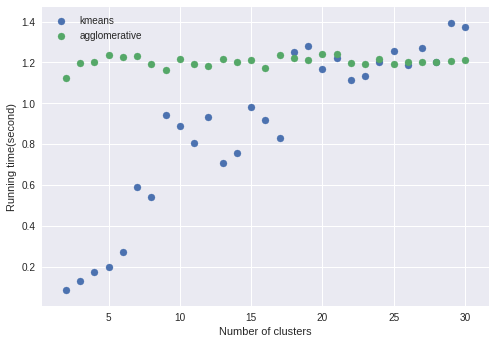

In [11]:
plt.scatter(range(2, 31), kmeans_times, label='kmeans')
plt.scatter(range(2, 31), agglomerative_times, label='agglomerative')
plt.ylabel('Running time(second)')
plt.xlabel('Number of clusters')
plt.legend()
plt.show()

```As the number of clusters increases, the running times of kmeans increase linearly while the running times of agglomerative clustering stay the same. If the number of clusters is small i.e. 4 then Kmeans performs better. But if the number of clusters is bigger than 25 then we should go for agglomerative clustering.```

### Dendrogram

[[  0.         509.06233053 520.49086544 ... 785.54874762 321.35124115
  186.15981871]
 [509.06233053   0.         138.68632961 ... 333.47708793 435.27956275
  350.36329937]
 [520.49086544 138.68632961   0.         ... 265.60265785 528.47344506
  338.78062705]
 ...
 [785.54874762 333.47708793 265.60265785 ...   0.         768.15305816
  602.10238358]
 [321.35124115 435.27956275 528.47344506 ... 768.15305816   0.
  352.98742589]
 [186.15981871 350.36329937 338.78062705 ... 602.10238358 352.98742589
    0.        ]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  


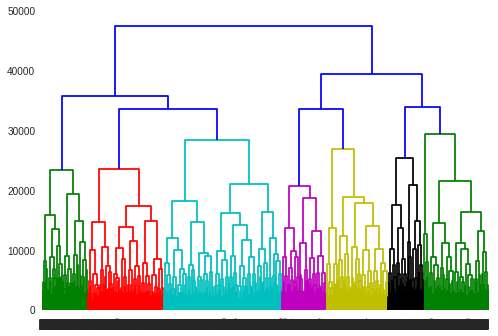

In [12]:
from scipy.spatial import distance_matrix 
from scipy.cluster import hierarchy 



dist_matrix = distance_matrix(X,X)
print(dist_matrix)
Z = hierarchy.linkage(dist_matrix, 'complete')
dendro = hierarchy.dendrogram(Z)